<a href="https://colab.research.google.com/github/Desmond-Tiny/FashionMNIST-Classifier-Study/blob/main/FashionMNIST_Classifier_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
**Project: FashionMNIST-CNN-Comparison**

Description:
This project explores multiple convolutional neural network (CNN) architectures
to classify images from the Fashion MNIST dataset. Different CNN models with varying
depths, layer configurations, and hyperparameters were implemented and trained to
compare their classification performance. The evaluation metrics include accuracy,
precision, recall, and F1-score on the test set. The goal is to analyze how architectural
choices impact model performance on this benchmark image classification task.

**Dataset:**
Fashion MNIST - 70,000 grayscale images of 28x28 pixels, categorized into 10 classes
representing different clothing items.

**Technologies:**
TensorFlow/Keras for model development, training, and evaluation.
"""


In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Flatten

In [ ]:
from tensorflow.keras.utils import to_categorical

#y_train,y_valid,y_test=to_categorical(y_train,10),to_categorical(y_valid,10),to_categorical(y_test,10)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

# Conv2D: 32,64,32
# MaxPool2D: (2,2)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


              precision    recall  f1-score   support

           0       0.83      0.79      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.68      0.87      0.76      1000
           3       0.85      0.84      0.85      1000
           4       0.83      0.64      0.72      1000
           5       0.97      0.96      0.97      1000
           6       0.66      0.67      0.67      1000
           7       0.95      0.95      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
    macro avg       0.87      0.86      0.86     10000
    weighted avg       0.87      0.86      0.86     10000




In [ ]:
(X_train_all,y_train_all),(X_test,y_test)= fashion_mnist

In [ ]:
X_train,y_train = X_train_all[:-5000],y_train_all[:-5000]
X_valid,y_valid=X_train_all[-5000:],y_train_all[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
#X_train=X_train/255.0
#X_train.reshape(-1,28,28,1)

In [ ]:
X_train=np.expand_dims(X_train,axis=-1)/255.0
X_valid=np.expand_dims(X_valid,axis=-1)/255.0
X_test=np.expand_dims(X_test,axis=-1)/255.0
y_train,y_valid,y_test=to_categorical(y_train,10),to_categorical(y_valid,10),to_categorical(y_test,10)

In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D
model4=tf.keras.Sequential()

model4.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model4.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model4.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model4.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))
y_proba=model4.predict(X_test)
preds=y_proba.argmax(axis=-1)
y_true=y_test.argmax(axis=-1)
print(classification_report(y_true,preds))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7766 - loss: 0.6209 - val_accuracy: 0.8952 - val_loss: 0.2818
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8992 - loss: 0.2739 - val_accuracy: 0.9072 - val_loss: 0.2505
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9174 - loss: 0.2291 - val_accuracy: 0.9200 - val_loss: 0.2302
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9308 - loss: 0.1883 - val_accuracy: 0.9012 - val_loss: 0.2766
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9405 - loss: 0.1587 - val_accuracy: 0.9196 - val_loss: 0.2323
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9499 - loss: 0.1353 - val_accuracy: 0.9224 - val_loss: 0.2303
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9587 - loss: 0.1090 - val_accuracy: 0.9242 - val_loss: 0.2416
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9663 - loss: 0.0920

In [ ]:
y_proba=model4.predict(X_test)
preds=y_proba.argmax(axis=-1)
y_true=y_test.argmax(axis=-1)
print(classification_report(y_true,preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.85      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.79      0.71      0.75      1000
           7       0.98      0.94      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D
model5=tf.keras.Sequential()

model5.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model5.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Flatten())
model5.add(Dense(64,activation='relu'))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(10,activation='softmax'))
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


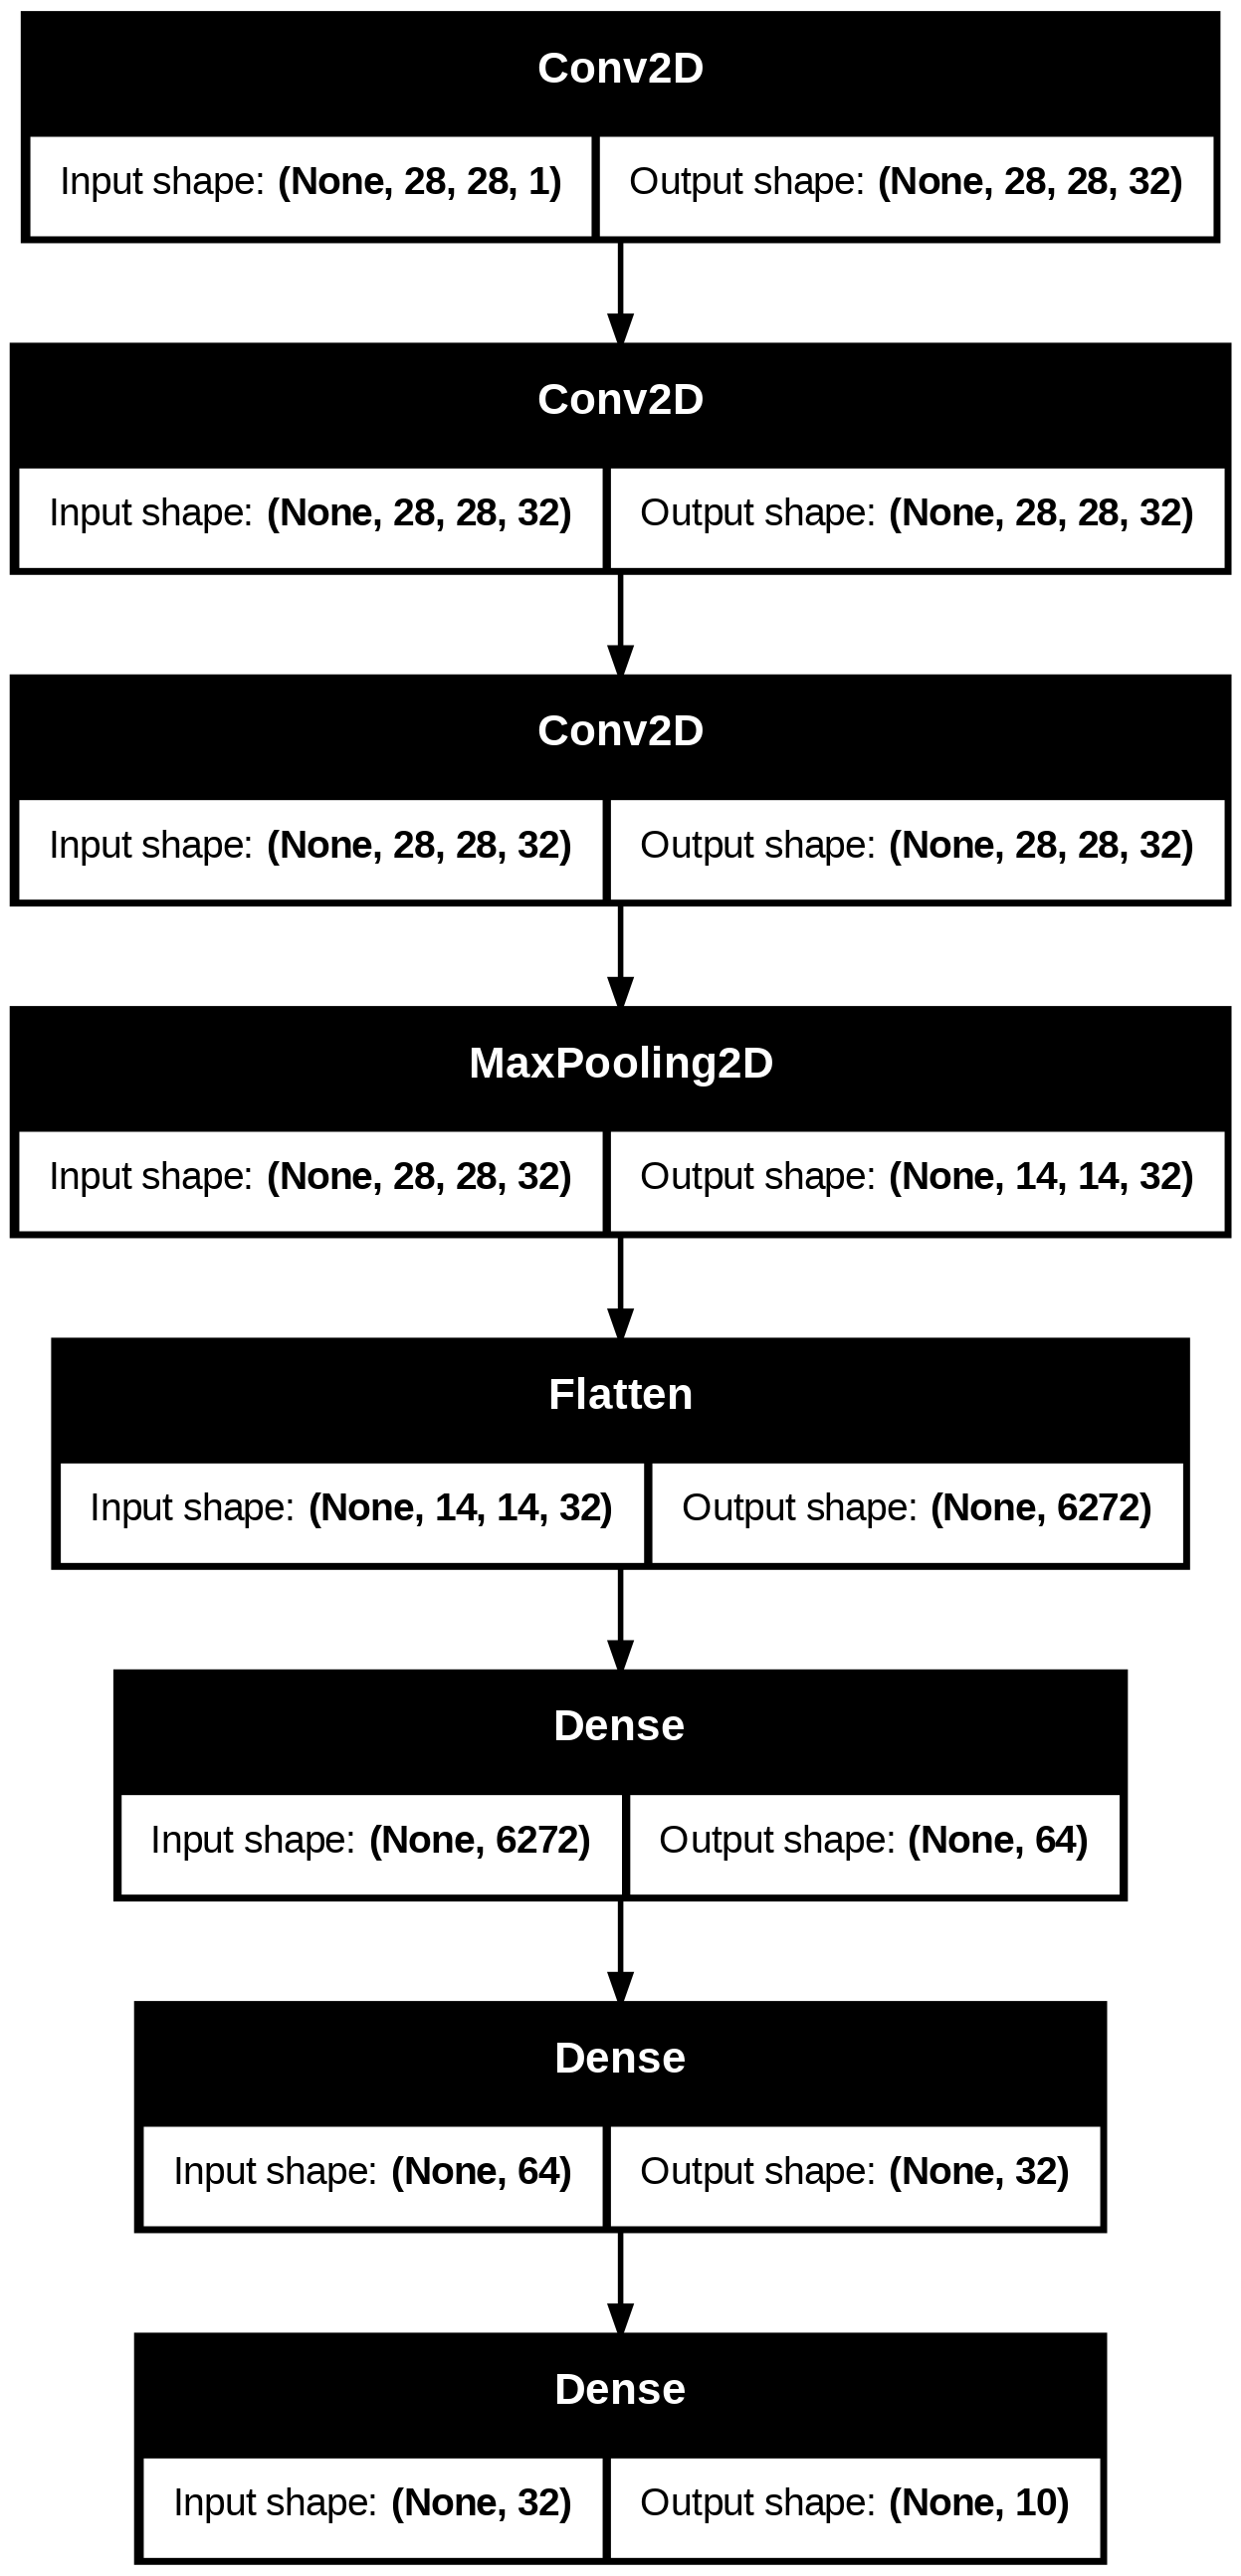

In [ ]:
tf.keras.utils.plot_model(model5,'test.png',show_shapes=True)

In [ ]:
history=model5.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))
y_proba=model5.predict(X_test)
preds=y_proba.argmax(axis=-1)
y_true=y_test.argmax(axis=-1)
print(classification_report(y_true,preds))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7858 - loss: 0.5896 - val_accuracy: 0.8924 - val_loss: 0.2889
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9109 - loss: 0.2478 - val_accuracy: 0.9120 - val_loss: 0.2419
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9314 - loss: 0.1857 - val_accuracy: 0.9212 - val_loss: 0.2161
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9456 - loss: 0.1501 - val_accuracy: 0.9284 - val_loss: 0.2144
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9551 - loss: 0.1229 - val_accuracy: 0.9192 - val_loss: 0.2293
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9664 - loss: 0.0943 - val_accuracy: 0.9220 - val_loss: 0.2471
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9738 - loss: 0.0722 - val_accuracy: 0.9232 - val_loss: 0.2688
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9807 - loss: 0.052

In [ ]:
'''

Conv2D ->32 k:3,3 pad:same strides=(2,2) activation=relu input_shape=(28,28,1)
MaxPool2D(2,2)

Conv2D ->64 k:3,3 pad:same strides=(2,2) activation? input_shape?
MaxPool2D(2,2)

Conv2D ->128 k:3,3 pad:same strides=(2,2) activation? input_shape?
MaxPool2D(2,2)


flattend
fully connected

f1 = ?
'''

'\n\nConv2D ->32 k:3,3 pad:same strides=(2,2) activation=relu input_shape=(28,28,1)\nMaxPool2D(2,2)\n\nConv2D ->64 k:3,3 pad:same strides=(2,2) activation? input_shape?\nMaxPool2D(2,2)\n\nConv2D ->128 k:3,3 pad:same strides=(2,2) activation? input_shape?\nMaxPool2D(2,2)\n\n\nflattend\nfully connected\n\nf1 = ?\n'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


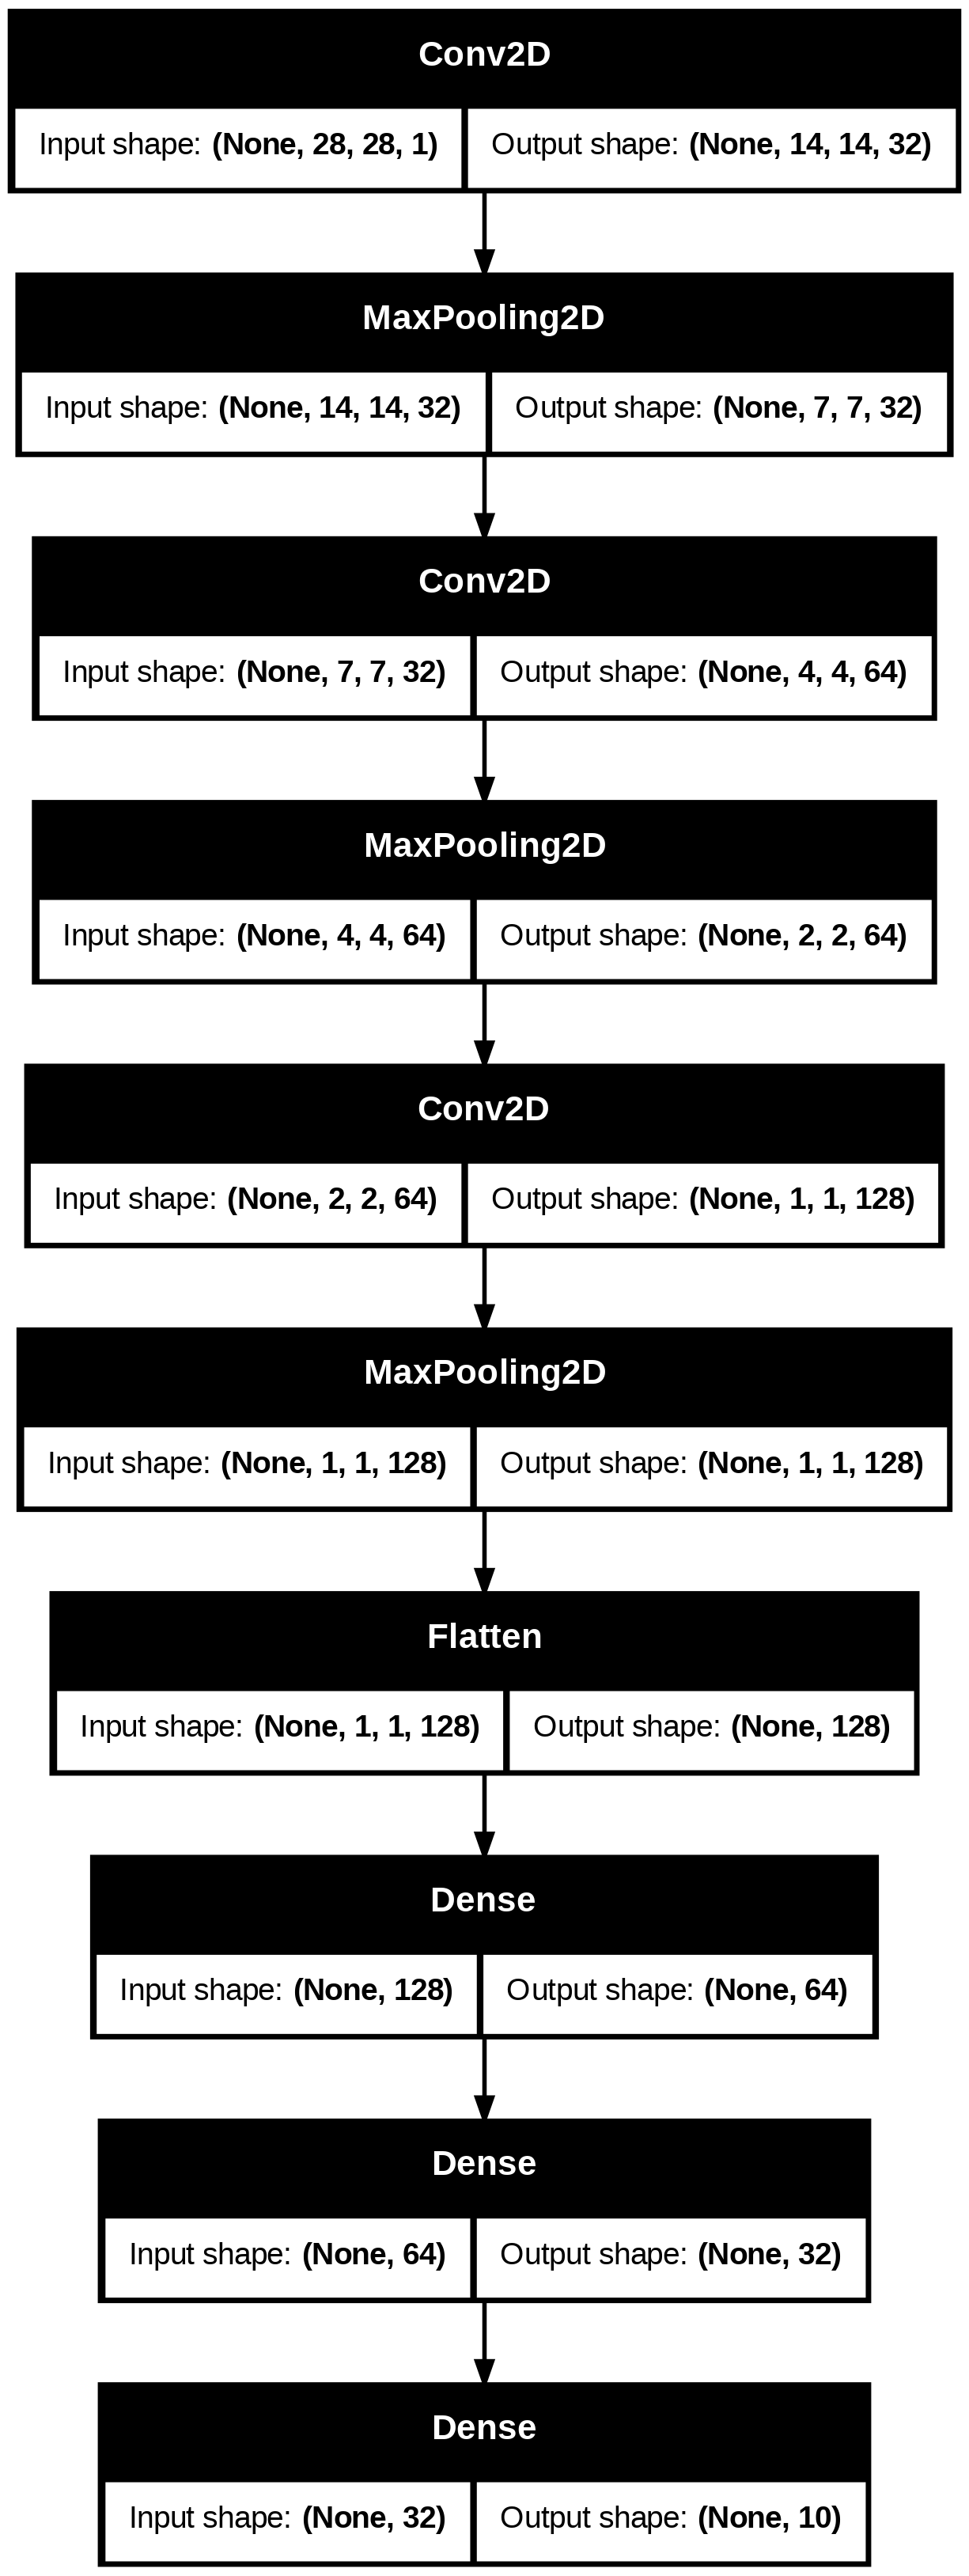

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D
model6=tf.keras.Sequential()

model6.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu',input_shape=(28,28,1)))
model6.add(MaxPool2D(pool_size=(2,2)))

model6.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'))
model6.add(MaxPool2D(pool_size=(2,2)))

model6.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'))
model6.add(MaxPool2D(pool_size=(2,2),padding='same'))

model6.add(Flatten())
model6.add(Dense(64,activation='relu'))
model6.add(Dense(32,activation='relu'))
model6.add(Dense(10,activation='softmax'))
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

tf.keras.utils.plot_model(model6,'test.png',show_shapes=True)

In [ ]:
history=model6.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))
y_proba=model6.predict(X_test)
preds=y_proba.argmax(axis=-1)
y_true=y_test.argmax(axis=-1)
print(classification_report(y_true,preds))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6818 - loss: 0.8975 - val_accuracy: 0.8538 - val_loss: 0.3991
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8566 - loss: 0.4006 - val_accuracy: 0.8618 - val_loss: 0.3628
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8797 - loss: 0.3324 - val_accuracy: 0.8842 - val_loss: 0.3159
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8935 - loss: 0.2910 - val_accuracy: 0.8880 - val_loss: 0.3082
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9000 - loss: 0.2700 - val_accuracy: 0.8936 - val_loss: 0.2901
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9066 - loss: 0.2522 - val_accuracy: 0.8946 - val_loss: 0.2860
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9116 - loss: 0.2333 - val_accuracy: 0.8958 - val_loss: 0.2823
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9167 - loss: 0.225

In [ ]:
model6.layers

[<Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [ ]:
layers_output=[]
out=X_test.copy()
print(out.shape)
for layer in model6.layers:
  out=layer(out)
  print(out.shape)
  layers_output.append(out)


(10000, 28, 28, 1)
(10000, 14, 14, 32)
(10000, 7, 7, 32)
(10000, 4, 4, 64)
(10000, 2, 2, 64)
(10000, 1, 1, 128)
(10000, 1, 1, 128)
(10000, 128)
(10000, 64)
(10000, 32)
(10000, 10)


In [ ]:
n=10

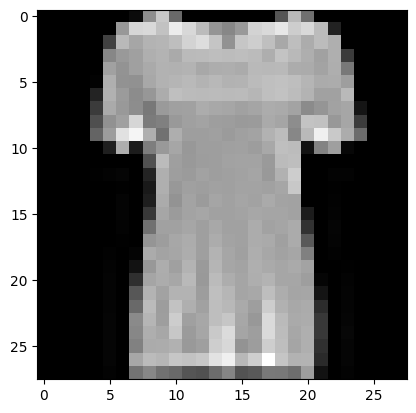

In [ ]:
plt.imshow(X_train[n],cmap='gray')

In [ ]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
current_layer_output = layers_output[2][n]
current_layer_output.shape

TensorShape([4, 4, 64])

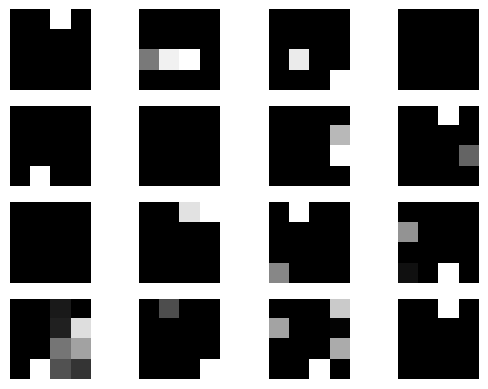

In [ ]:
fig,ax = plt.subplots(4,4)
for i in range(16):
  ax[i//4][i%4].imshow(current_layer_output[:,:,i],cmap='gray')
  ax[i//4][i%4].axis('off')


**Conclusion:**

Model 6 achieves an overall accuracy of 90%, which is slightly lower than Models 4 and 5 (both around 91%). However, the class-wise precision, recall, and F1-scores reveal important nuances:

**Strong Classes Across All Models:**

Classes like 1 (Top), 5 (Sandal), 7 (Sneaker), 8 (Bag), and 9 (Ankle boot) consistently show very high precision and recall (around 0.95-1.00), indicating these items are easier for the models to distinguish regardless of architecture.

**Moderate Performance Classes:**

Classes such as 0 (T-shirt/top), 2 (Pullover), 3 (Dress), and 4 (Coat) have good precision and recall (mostly above 0.85) in all models, but Model 6’s recall for class 0 (0.89) and class 3 (0.89) is slightly improved compared to others, indicating it sometimes better captures these categories.

**Challenging Classes:**

Class 6 (Shirt) remains the hardest to classify across all models, with precision and recall around 0.66-0.79 and 0.67-0.76 respectively. Model 6’s precision (0.75) and recall (0.71) for class 6 are on par with or slightly better than Model 4 but lower than Model 5’s precision (0.74) and recall (0.76). This shows that this class’s features are intrinsically more difficult to distinguish, and the model architecture has limited impact here.

**Tradeoffs in Model 6:**

Model 6’s aggressive downsampling via strides and pooling reduces feature map size faster, which may cause some loss of fine-grained details, possibly explaining the small drop in overall accuracy and per-class metrics on classes like 2 and 6 compared to Model 5. However, it slightly improves recall on certain classes like 0 and 3, indicating it learns robust high-level features effectively.



| Model       | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-score (macro avg) | Notes                                                          |
| ----------- | -------- | --------------------- | ------------------ | -------------------- | -------------------------------------------------------------- |
| Model 4     | 0.91     | 0.91                  | 0.91               | 0.91                 | 3 Conv layers, standard strides                                |
| Model 5     | 0.91     | 0.92                  | 0.91               | 0.92                 | 3 Conv layers, all padding='same'                              |
| **Model 6** | **0.90** | **0.90**              | **0.90**           | **0.90**             | 3 Conv layers with strides=2 and pooling, deeper channel sizes |

